# ПРОЕКТ 4: Определение перспективного мобильного тарифа

<br/>
    
<div class="alert alert-info">
<h2> Привет!<a class="tocSkip"></h2>
<hr>  
Я - Сергей. Рад что ты читаешь это текст :) Сделаю пару ремарок общего характера. В описании выполняемых действий, комментариях, я использую местоимение 'мы', так как считаю что ты - ревьювер, проверя код становиться моим соучастником ('соучавствующие программирование') и мы вместе проходим по пути исследования. Да и сформировлась привычка так писать в ходе написания научных работ.   
NB! - так помечаю важные на мой взгдял идеи, которые стоит взять на заметку; инсайты, проработка которых требует большего знания предметной области.   
Надеюсь мои многословные комментарии тебя не утомят.    
</div>
    
<br/>

# Оглавление

[0. Описание проекта](#description)   
[1. Изучение данных](#exploration)   
[2. Подготовка данных](#preparing)   
[2.1. Очистка и изменение типов данных](#clearing)   
[2.1.1. Изменение типов данных](#change)   
[2.1.2. Удаление колонки](#drop)   
[2.1.3. Проверка дубликатов](#duplicates)   
[2.1.4. Поиск (почти) аномалий](#anomalies)   
[2.2. Подсчёт метрик для каждого пользователя](#counting)   
[2.3. Расчёт помесячной выручки каждого из пользователей](#сalculation)   
[3. Анализ данных](#analysis)   
[3.1. Анализ поведения клиентов разных тарифов](#behaviour_analysis)   
[3.2. Подсчёт среднего, дисперсии и стандартного отклонения для всех пользователей](#descriptive_statistics)   
[3.3. Описание распределения](#distribution_description)   
[4. Проверка гипотез](#hypothesis_testing)   
[4.1. Гипотеза 1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются](#hypothesis_1)   
[4.2. Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#hypothesis_2)    
[4. Общий вывод](#summary)


---

# 0. Описание проекта <a id="description"></a>
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов** 
1. Тариф «Смарт»
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика   
Стоимость услуг сверх тарифного пакета:   
- минута разговора: 3 рубля  
- сообщение: 3 рубля  
- 1 Гб интернет-трафика: 200 рублей   
2. Тариф «Ультра»  
Ежемесячная плата: 1950 рублей   
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:   
- минута разговора: 1 рубль   
- сообщение: 1 рубль   
- 1 Гб интернет-трафика: 150 рублей

**Описание данных**  
1. Таблица users (информация о пользователях):   
* user_id — уникальный идентификатор пользователя   
* first_name — имя пользователя   
* last_name — фамилия пользователя   
* age — возраст пользователя (годы)   
* reg_date — дата подключения тарифа (день, месяц, год)   
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) 
* city — город проживания пользователя   
* tariff — название тарифного плана   
2. Таблица calls (информация о звонках):   
* id — уникальный номер звонка   
* call_date — дата звонка   
* duration — длительность звонка в минутах   
* user_id — идентификатор пользователя, сделавшего звонок   
3. Таблица messages (информация о сообщениях):   
* id — уникальный номер сообщения   
* message_date — дата сообщения   
* user_id — идентификатор пользователя, отправившего сообщение   
4. Таблица internet (информация об интернет-сессиях):   
* id — уникальный номер сессии   
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)   
* session_date — дата интернет-сессии   
* user_id — идентификатор пользователя   
5. Таблица tariffs (информация о тарифах):   
* tariff_name — название тарифа   
* rub_monthly_fee — ежемесячная абонентская плата в рублях   
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату   
* messages_included — количество сообщений в месяц, включённых в абонентскую плату   
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)   
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)   
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета   
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)   
   
**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.   

---

# 1. Изучение данных <a id="exploration"></a>

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime  # для получения дня недели из даты
import seaborn as sns

In [3]:
#Прочитаем файлы с гугл диска
from io import BytesIO
import requests
spreadsheet_id_calls = '1m_dgatIt7V6sjOz2CFh4qaNDQCL-OKqoid0ySnaCSwA'
spreadsheet_id_internet = '1nYcmElfvcefUbhmXr6eV0tXVzHUb0S_IaJBDm5iLos4'
spreadsheet_id_messages = '1iCGU1LpOiIJDd9YAOuM_jrSd1f7m2PC2z-WgIgqy9MY'
spreadsheet_id_tariffs = '1AOHEvYeTZtaOVE2a8l7YONVGhIgiLjJH-nDLvAulik4'
spreadsheet_id_users = '18CSqR8lnMInY51PCdCT0exrD3p3FK6fV1NBe9r90OtU'
file_name_calls = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_calls)
file_name_internet = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_internet)
file_name_messages = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_messages)
file_name_tariffs = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_tariffs)
file_name_users = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id_users)
r_calls = requests.get(file_name_calls)
r_internet = requests.get(file_name_internet)
r_messages = requests.get(file_name_messages)
r_tariffs = requests.get(file_name_tariffs)
r_users = requests.get(file_name_users)
calls = pd.read_csv(BytesIO(r_calls.content))
internet = pd.read_csv(BytesIO(r_internet.content), index_col=0)
messages = pd.read_csv(BytesIO(r_messages.content))
tariffs = pd.read_csv(BytesIO(r_tariffs.content))
users = pd.read_csv(BytesIO(r_users.content))
pd.set_option('display.max_columns', 20) 

In [4]:
calls.info() # получим сводку по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице calls нет пропущеных значений. Но, значения колонки call_date имеют тип object, а не даты - изменим тип.

In [5]:
internet.info() # получим сводку по таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В таблице internet нет пропущеных значений. Но, 1. есть колонка Unnamed: 0 - дублирующая индекс строк. В описании полей её нет - удалим колонку; 2. значения колонки session_date имеют тип object, а не даты - изменим тип.

In [6]:
messages.info() # получим сводку по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages нет пропущеных значений. Но, значения колонки message_date имеют тип object, а не даты - изменим тип.

In [7]:
tariffs.info() # получим сводку по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице tariffs описание двух тарифов. Без пропусков. Типы данных не трогает.

In [8]:
users.info() # получим сводку по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице users пропуски только в колонке churn_date — дата прекращения пользования тарифом, но если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Но, значения колонки reg_date и churn_date имеют тип object, а не даты - изменим тип.

**Подитожим** в ряде таблиц нужно изменить тип даннх для некоторых колонок, нужно удалить нужно колонку.

---

# 2. Подготовка данных <a id="preparing"></a>

## 2.1. Очистка и изменение типов данных <a id="clearing"></a> 

### 2.1.1.  Изменение типов данных <a id="change"></a>

In [9]:
# Приведём данные колонки call_date таблицы calls в тип datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#display(calls)
#calls.info()

In [10]:
# Приведём данные колонки message_date таблицы messages в тип datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
#display(messages)
#messages.info()

In [11]:
# Приведём данные колонки reg_date таблицы users в тип datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
#display(users)
#users.info()

**!!!** Так как в колонке churn_date много пропусков, и обрабатывать пропуски мы не будем, то оставим тип данных в колонке как есть. В дальнешем анализе данные колонки churn_date использоваться не будут.  

In [12]:
# Приведём данные колонки session_date таблицы internet в тип datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#display(internet)
#internet.info()

### 2.1.3.  Проверка дубликатов <a id="duplicates"></a>

In [13]:
# Проверка на дубликаты. Сделам это в цикле.
# Составим список названий таблиц.
list_tables = [calls, messages, internet, tariffs, users]
# Составим список имён таблиц, для вывода.
name_tables = ['calls', 'messages', 'internet', 'tariffs', 'users']
for i in range(0, len(list_tables)):
    if list_tables[i].duplicated().sum() == 0:
        print('В колонке ', name_tables[i], ' нет дубликатов')
    elif list_tables[i].duplicated().sum() != 0:
        print('В колонке ', name_tables[i], ' дубликаты есть')

В колонке  calls  нет дубликатов
В колонке  messages  нет дубликатов
В колонке  internet  нет дубликатов
В колонке  tariffs  нет дубликатов
В колонке  users  нет дубликатов


**Вывод** в колонках нет дублирующих значений

### 2.1.4.  Поиск (почти) аномалий <a id="anomalies"></a>

Из условий известно, что в данных есть звонки с нулевой продолжительностью - пропущенные звонки. Узнаем сколько их.

In [14]:
null_duration = calls[calls['duration']==0]['duration'].count()
null_duration_percent = (null_duration/(len(calls['duration']))*100).round(1)
print('Доля пропущеных звонков', null_duration_percent, '%')

Доля пропущеных звонков 19.6 %


**Вывод** почти каждый пятый звонок пропущенный. Но, мы их не трогаем, не изменяем.

**Подитожим** по пункту 2.1.:
1. Мы изменили в ряде колонок тип данных, приведя их значений к типу datetime.    
1. Удалили из одной талицы колонку, видимо артефакт выгрузки данных.    
1. Проверили наличие дублирующих набблюдений - их нет.   
1. Изучили на пврый взгляд аномалию - звонки с нулевой продолжительностью, но это не ошидка, а сосбенности учёта звонков.

## 2.2. Подсчёт метрик для каждого пользователя <a id="counting"></a>

Необходимо посчитать для каждого пользователя следующие метрики:   
* количество сделанных звонков и израсходованных минут разговора по месяцам;  
* количество отправленных сообщений по месяцам;   
* объем израсходованного интернет-трафика по месяцам;   
* помесячную выручку с каждого пользователя.

In [15]:
#Добавим в таблицу calls колонку с порядковым чиcлом месяца - month и запишем, в неё порядковый номер месяца
calls['month'] = calls['call_date'].apply(lambda x: x.month)
#calls['month'] = calls['month'].map(months) # И поменяем значения на названия месяцев
#calls.head()

In [16]:
#Добавим в таблицу messages колонку с порядковым чиcлом месяца - month и запишем, в неё порядковый номер месяца
messages['month'] = messages['message_date'].apply(lambda x: x.month)
#messages['month'] = messages['month'].map(months) #И поменяем значения на названия месяцев
#messages.head()

In [17]:
#Добавим в таблицу internet колонку с порядковым чиcлом месяца - month и запишем, в неё порядковый номер месяца
internet['month'] = internet['session_date'].apply(lambda x: x.month)
#internet['month'] = internet['month'].map(months) #И поменяем значения на названия месяцев
#internet.head()

Для расчёта необходимых метрик по каждому из клиентов используем сводные таблицы

In [18]:
# Округлим значения длительности звонков и объёма интернет-трафика до целых чисел в большую сторону 
# с помощью функции ceil() библиотеки numpy (https://numpy.org/doc/stable/reference/generated/numpy.ceil.html)
# Метод round округляет к ближашему целому - как в низ, так и вверх,
# и нам он не подойдёт, т.к. по условиям всё округляеся вверх
calls['duration'] = np.ceil(calls['duration'])

In [19]:
# Создадам pivot_table по таблице calls, сгуппировав значения по 'user_id' и 'month' 
# подсчитав число звонков и их продолжительность
calls_pivot = calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':'count', 'duration':sum}) 
calls_pivot.columns = ['calls_count', 'calls_duration'] #переименуем колонки, дав им содержательные названия
calls_pivot.head()
# Этой же логики будем придерживаться и с другими таблицами

calls_count  calls_duration
user_id month                             
1000    5               22           159.0
        6               43           172.0
        7               47           340.0
        8               52           408.0
        9               58           466.0

In [20]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'}) #Подсчитаем частоту 
messages_pivot.columns = ['messages_count'] #переименуем колонки, дав им содержательные названия
messages_pivot.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

In [21]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], aggfunc={'mb_used':sum}) #Подсчитаем сумму 
internet_pivot.columns = ['traffic_volume'] #переименуем колонки, дав им содержательные названия
internet_pivot.head()

traffic_volume
user_id month                
1000    5             2253.49
        6            23233.77
        7            14003.64
        8            14055.93
        9            14568.91

Для подсчёта помесячной выручки с каждого пользователя объеденим таблицу users и полученные сводные таблицы мотодом join

In [22]:
# При помощи метода join объеденим все сводные таблицы по индексам и сбросим индекс month
# Заменил на метод outer
users_pivot = calls_pivot.join([messages_pivot, internet_pivot], how='outer').reset_index(level='month')
users_pivot.head()

,month,calls_count,calls_duration,messages_count,traffic_volume
user_id,,,,,
1000,5,22.0,159.0,22.0,2253.49
1000,6,43.0,172.0,60.0,23233.77
1000,7,47.0,340.0,75.0,14003.64
1000,8,52.0,408.0,81.0,14055.93
1000,9,58.0,466.0,57.0,14568.91


In [23]:
# Проверка
print(internet_pivot['traffic_volume'].sum())
print(users_pivot['traffic_volume'].sum())
print(messages_pivot['messages_count'].sum())
print(users_pivot['messages_count'].sum())
print(calls_pivot['calls_duration'].sum())
print(users_pivot['calls_duration'].sum())

55305267.730000004
55305267.730000004
123036
123036.0
1450301.0
1450301.0


In [24]:
users_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1000 to 1499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           3214 non-null   int64  
 1   calls_count     3174 non-null   float64
 2   calls_duration  3174 non-null   float64
 3   messages_count  2717 non-null   float64
 4   traffic_volume  3203 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.7 KB


In [25]:
# Объединяем таблицу users и user_pivot методом join
# параметру метода join on передаем значения таблицы users - user_id
# метод join будет искать совпадения этих значений с индексами user_pivot и объединять по ним
data_pivot = users.join(users_pivot, on='user_id')
data_pivot['traffic_volume'] = np.ceil(data_pivot['traffic_volume'])

data_pivot.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_duration,messages_count,traffic_volume
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,2254.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,23234.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,14004.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,14056.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,14569.0


In [26]:
# Приведём получившуюся таблицу в порядок
# Удалим колонки, которые не пригодятся нам для дальнешего анализа
data_pivot = data_pivot.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')

In [27]:
# Добавим к таблице data_pivot информацию о тарифах из таблицы tariffs
# объеденив таблицы по колонке с названиями тарифов
# Но, для этого сначала в tariffs поменяем название нужного колонки tariff_name на tariff
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
# Для объденения таблиц применим метод merge, 
# параметру on передадим колонку с названиями тарифов, параметр how отсвим по умолчанию - inner
data_pivot = data_pivot.merge(tariffs, on='tariff')
#data_pivot.head()

In [28]:
# Проверим наличие пропусков
data_pivot.isnull().sum()

user_id                    0
age                        0
city                       0
tariff                     0
month                      2
calls_count               42
calls_duration            42
messages_count           499
traffic_volume            13
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

**Вывод** в объедененной таблице есть пропущенные значения: в колонках month, calls_count, calls_duration (по 8 пропусков), messages_count (504 пропуска) и traffic_volume (19 пропусков).   
1. Пропуски в колонке month - удалим, заменить их нулём, средним или медианной нельзя, и мы потеряем небольшое число наблюдений.    
1. Пропуски в колонках calls_count, calls_duration и traffic_volume - заменил на ноль, это не должно повлиять на общую картину.  
1. Пропуски в колонке messages_count - заменил на ноль - возможно пропуски означают что клинеты не отправляи SMS, **НО!** если это не так - замены могут повлиять на наши выводы.

In [29]:
# Пропуски в колонке month - удалим
data_pivot = data_pivot.dropna(subset=['month'])

# В остальных калонках заменим пропуски на ноль
data_pivot = data_pivot.fillna(0)
#data_pivot.isnull().sum() #Пропусков нет

**Подитожим** у нас есть соводная таблица по всем пользователям с объёмом потребляемых ими услуг, тарифом и его деталями.

## 2.3. Расчёт помесячной выручки каждого из пользователей <a id="сalculation"></a>

Рассчитаем помесячную выручку при помощи функции

In [30]:
# Напишем функцию, которая будет принимать строки таблицы data_pivot как аргументы
def total_monthly_account(row):
    
# Зададим переменные:
    account_minutes = 0 # Счёт за минуты сверх плана
    account_sms = 0 # Счёт за SMS сверх плана
    account_traffic = 0 # Счёт за интренет-трафик сверх плана
    minutes = row['calls_duration'] # Ежемесячная продолжительсть звоноков
    sms = row['messages_count'] # Ежемесячное число SMS
    traffic = row['traffic_volume'] # Ежемесячный трафик
    tariff = row['tariff'] # Название тарифа
    limit_minutes = row['minutes_included'] # Ежемесячный лимит минут входящих в цену тарифа
    limit_sms = row['messages_included'] # Ежемесячный лимит SMS входящих в цену тарифа 
    limit_traffic = row['mb_per_month_included'] # Ежемесячный лимит трафика входящий в цену тарифа 
    rub_monthly_fee = row['rub_monthly_fee'] # Ежемесячный палатёж за тариф
    rub_per_gb = row['rub_per_gb'] # Цена Гб трафика сверх объема трифа
    rub_per_message = row['rub_per_message'] # Цена SMS сверх объема трифа
    rub_per_minute = row['rub_per_minute'] # Цена минуты разговора сверх объема трифа

# Проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа.
# Если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
# Если больше - то разницу умножаем на стоимость сверх тарифного плана.
    
    if minutes > limit_minutes:
        account_minutes += (minutes - limit_minutes) * rub_per_minute
    if minutes < limit_minutes:
        account_minutes = 0
    if sms > limit_sms:
        account_sms += (sms - limit_sms) * rub_per_message
    if sms < limit_sms:
        account_sms = 0
    if traffic > limit_traffic:
        account_traffic += (np.ceil((traffic - limit_traffic) / 1024 )) * rub_per_gb # округляем мегабайты вверх до гигабайт
    if traffic < limit_traffic:
        account_traffic = 0
        
# Функция возвращает итоговый счет за месяц для клиента,
# в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
    return account_minutes + account_sms + account_traffic + rub_monthly_fee     

In [31]:
#С помощью метода apply() применяем функцию ко всем строкам таблицы data_pivot, 
# записывая тоговую сумму в новую колонку total_account
data_pivot['total_account'] = data_pivot.apply(total_monthly_account, axis=1) # axis=1 чтобы метод принимал строки, а не колонки
data_pivot.head()

,user_id,age,city,tariff,month,calls_count,calls_duration,messages_count,traffic_volume,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_account
0,1000,52,Краснодар,ultra,5.0,22.0,159.0,22.0,2254.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,Краснодар,ultra,6.0,43.0,172.0,60.0,23234.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,Краснодар,ultra,7.0,47.0,340.0,75.0,14004.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,Краснодар,ultra,8.0,52.0,408.0,81.0,14056.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,Краснодар,ultra,9.0,58.0,466.0,57.0,14569.0,1000,30720,3000,1950,150,1,1,1950.0


**Подитожим** Теперь мы знаем сколько потратил каждый из клиентов за время использования тарифа.

---

# 3. Анализ данных <a id="analysis"></a>

## 3.1. Анализ поведения клиентов разных тарифов <a id="behaviour_analysis"></a>

Агрегируем данные из таблицы data_pivot в разрезе тарифов и месяцев.  

In [32]:
data_tariff_pivot = (data_pivot.pivot_table(index=['tariff', 'month'],
                    values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_account'],
                    aggfunc=sum))

data_tariff_pivot = data_tariff_pivot.reset_index(level='month')
display(data_tariff_pivot)

,month,calls_count,calls_duration,messages_count,total_account,traffic_volume
tariff,,,,,,
smart,1.0,941.0,6931.0,620.0,24525.0,289482.0
smart,2.0,2331.0,17324.0,1397.0,48001.0,672656.0
smart,3.0,4183.0,30034.0,2453.0,89676.0,1163058.0
smart,4.0,5747.0,41119.0,3443.0,107866.0,1507817.0
smart,5.0,7789.0,54618.0,4762.0,168849.0,2228598.0
smart,6.0,9110.0,64885.0,5478.0,197459.0,2590405.0
smart,7.0,11402.0,82079.0,6784.0,246014.0,3164469.0
smart,8.0,13860.0,99045.0,7905.0,310340.0,3903634.0
smart,9.0,15482.0,111439.0,8746.0,324986.0,4239065.0


Для большей наглядности визуализируем данные - построим столбчатые диаграммы распределения суммарных значений параметров в течение года.

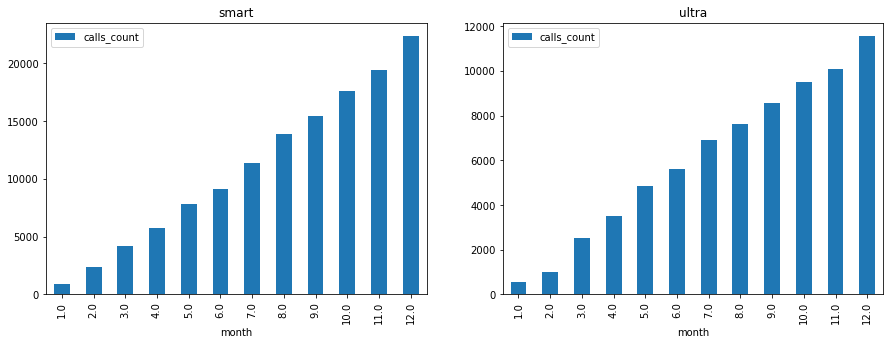

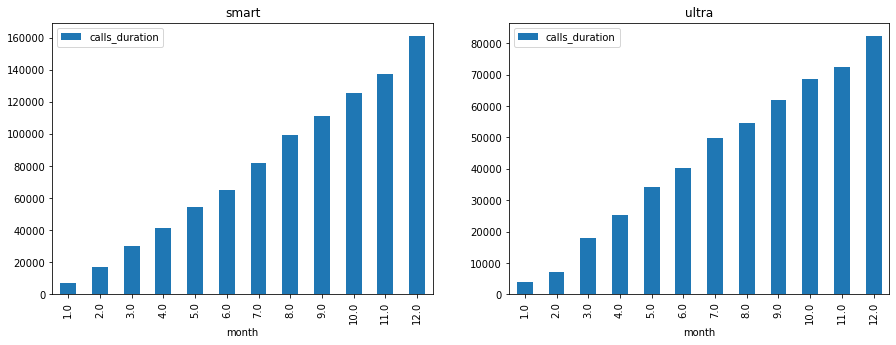

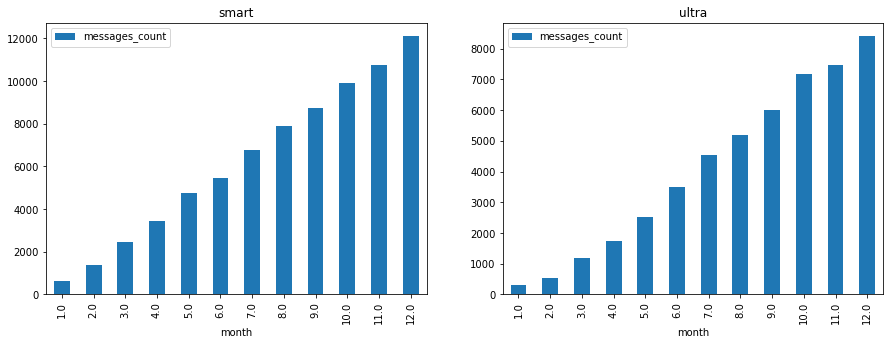

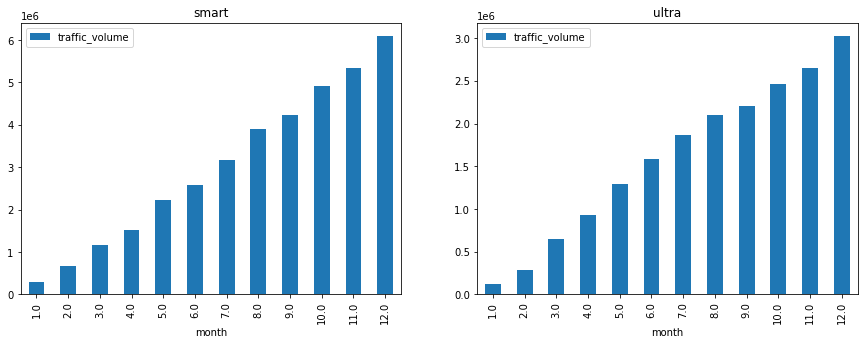

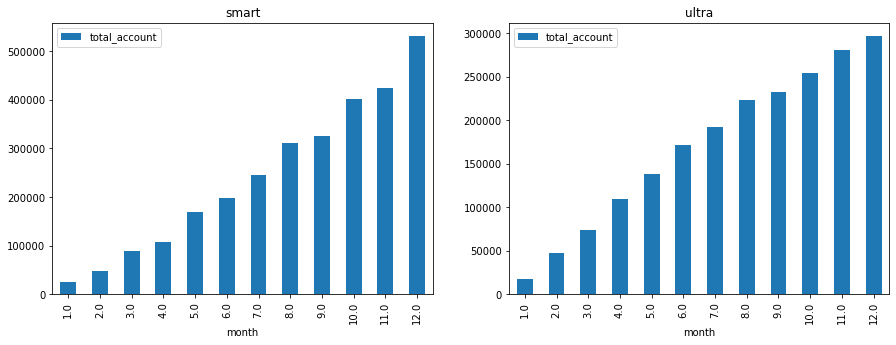

In [33]:
for column in ['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_account']:
    fig, axs = plt.subplots(1,2)
    data_tariff_pivot[data_tariff_pivot.index=='smart'].plot(x='month', y=column, kind='bar', title='smart', ax=axs[0], figsize=(15, 5))
    data_tariff_pivot[data_tariff_pivot.index=='ultra'].plot(x='month', y=column, kind='bar', title='ultra', ax=axs[1], figsize=(15, 5))

**Выводы:**   
1. Существенной разницы в поведении клиентов, использующих разные тарифы мы не видим.    
1. Потребление всех услуг - звонков (числа и минут), SMS и интернет-трафика - линейно растут на протяжении года. Как будь-то это значения накопленным итогом - **Гипотеза** оба тарифа запустили в начале года и в течении года число их клиентов росло.

<AxesSubplot:ylabel='user_id'>

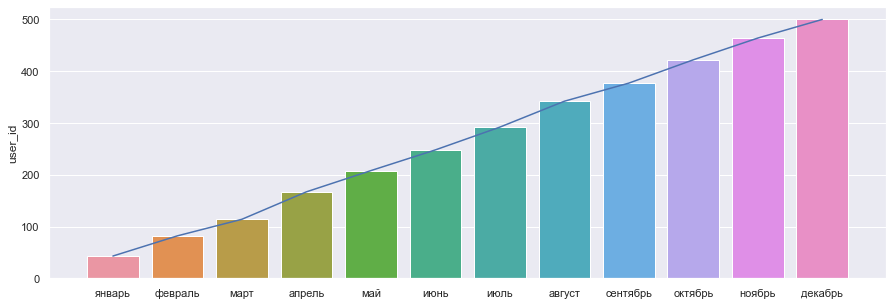

In [34]:
# Проверим гипотезу
users['month'] = users['reg_date'].apply(lambda x: x.month) # Узнаем месяц регистраци клиента
#Подсчитам число новых клиентов накопленым итогом
users_pivot = (users.pivot_table(index=['month'], values=['user_id'], aggfunc='count')).cumsum()
# Визуализируем число клиентов накопленым итогом по месяцам
months = ['январь', 'февраль', 'март', 'апрель', 
                    'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
sns.set(rc={'figure.figsize':(15,5)}) # зададим размеры графика
sns.barplot(data=users_pivot, x=months, y='user_id')
sns.lineplot(data=users_pivot, x=months, y='user_id')

**Подитожим** число клиентов ежемесячно увеличиволось с начала года, следовательно суммарный объём услуг которые они потребляли и их траты - росли. 

## 3.2. Подсчёт среднего, дисперсии и стандартного отклонения для всех пользователей <a id="descriptive_statistics"></a>

In [35]:
# Посмотрим на описательную статистику по каждой из колонок таблицы data_pivot
#(data_pivot.describe()).round()

In [36]:
for i in range(0, 3):
    functions = ['mean', np.var, np.std] # Функции, которые будем применять к значениям
    tables = ['total_month_mean', 'total_month_var', 'total_month_std'] # Названия сводных таблиц
    list_of_cols = ['calls_duration', 'messages_count', 'traffic_volume', 'total_account'] # Названия колонок со значениями
    suffix = ['_mean', '_var', '_std'] # Пояснения, который добавим к именам колонок
    
    tables[i] =  data_pivot.pivot_table(index=['tariff'], values=list_of_cols, aggfunc=functions[i])
    tables[i].columns = ['calls_duration'+suffix[i], 'messages_count'+suffix[i], 'traffic_volume'+suffix[i], 'total_account'+suffix[i]]
    display(tables[i])

,calls_duration_mean,messages_count_mean,traffic_volume_mean,total_account_mean
tariff,,,,
smart,417.934948,33.384029,1289.973531,16208.873486
ultra,526.623350,49.363452,2070.152284,19469.308629


,calls_duration_var,messages_count_var,traffic_volume_var,total_account_var
tariff,,,,
smart,36219.315784,796.812958,669785.708006,3.446256e+07
ultra,100873.633397,2285.266143,141516.745079,1.017516e+08


,calls_duration_std,messages_count_std,traffic_volume_std,total_account_std
tariff,,,,
smart,190.313730,28.227876,818.404367,5870.482332
ultra,317.606098,47.804457,376.187114,10087.197726


**Выводы:**   
1. В среднем клиенты тарифа «Ультра» больше используют больший объём каждой из услуг, чем пользователи тарифа «Смарт», и их счета (а для компании это выручка) соответсвенно выше.   
1. Дисперсия у тарифа «Ультра» выше чем у тарифа «Смарт», кроме параметра интернет-трафика. Причинами этого могут быть:
* Меньший объём наблюдений (выборки) клиентов с тарифом «Ультра» чем с тарифом «Смарт».   
* Меньшая дисперсия в интернет-трафике может свидетельствовать о том, что клиенты тарифа «Ультра» меньше следят за использованием интернет-трафика и выбирают тариф именно из-за большего объёма трафика. В тоже время на тарифе «Смарт» объём трафика, входящего в ежемесячный платёж, меньше и клинтеы следт и экономят, чтобы не допускать перерасход.   
3. Стандартное оклонение у тарифа «Ультра» выше чем у тарифа «Смарт» - клиенты тарифа чувствуют себя свободнее в использовании услуг. 

## 3.3. Описание распределения <a id="distribution_description"></a>

In [37]:
# Используя pivot_table сгруппируем данные по тарифу и пользователям
data_pivot_hist = (data_pivot
                     .pivot_table(index=['tariff', 'user_id'],\
                                  values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_account'],\
                                  aggfunc=sum))
data_pivot_hist.reset_index(inplace=True)
data_pivot_hist.head()

,tariff,user_id,calls_count,calls_duration,messages_count,total_account,traffic_volume
0,smart,1001,122.0,844.0,0.0,1700.0,32467.0
1,smart,1002,217.0,1517.0,70.0,7250.0,116041.0
2,smart,1005,888.0,6605.0,552.0,9924.0,99692.0
3,smart,1006,506.0,3501.0,0.0,10250.0,164194.0
4,smart,1007,612.0,4379.0,225.0,8221.0,131631.0


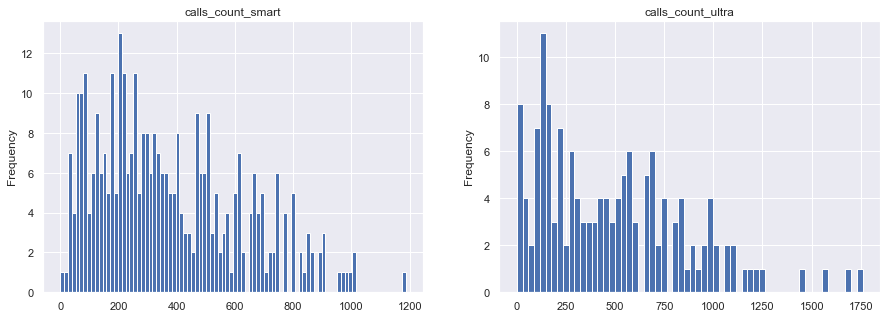

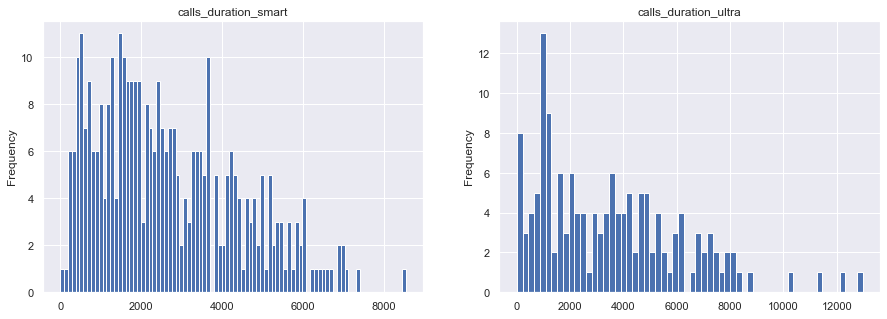

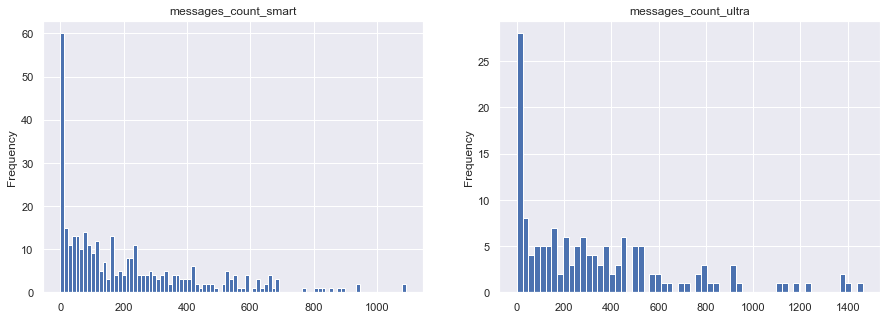

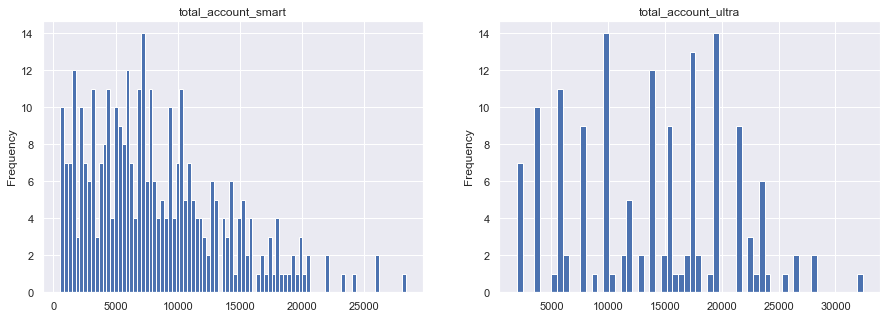

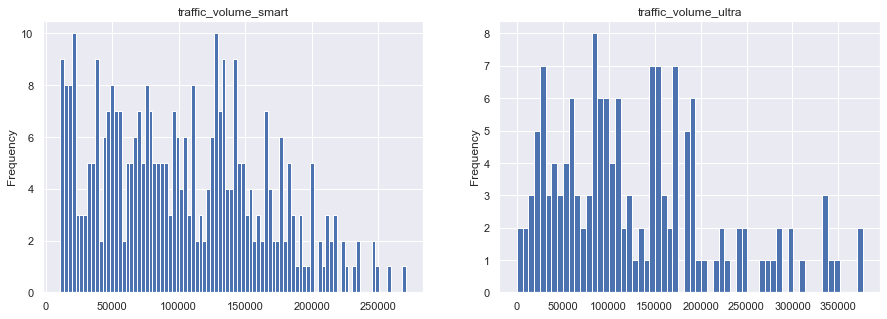

In [38]:
# Для большей наглядности визуализируем данные
# построим гистограммы по каждому показателю в разрезе тарифов

for name_column in data_pivot_hist.columns[2:]:
    fig, axs = plt.subplots(1,2)
    data_pivot_hist[data_pivot_hist['tariff']=='smart'][name_column].plot(bins=90, kind='hist', figsize=(15, 5), title=name_column+'_smart', ax=axs[0])
    data_pivot_hist[data_pivot_hist['tariff']=='ultra'][name_column].plot(bins=60, kind='hist', figsize=(15, 5), title=name_column+'_ultra', ax=axs[1])

**Выводы:**  
1. **Количество звонков** Пользователи тарифа «Смарт» звонят чаще чем пользователи тарифа «Ультра» - 200 звонков против примерно 120-130 звонков.   
1. **Продолжительность звонков** У клиентов тарифа «Смарт» наблюдается два пика - 400 и 1500 минут в год, у «Ультра» один - около 1000 минут в год. Большинство пользователей тарифа «Смарт» говорят не больше 6000 минут в год, в то время как клиенты «Ультра» почти 8000 минут.   
1. **Число SMS** Среди клиентов обоих тарифов высока доля клиентов, крайне мало использующих SMS.   
1. **Интернет-трафик** У обоих тарифов наблюдается четкая граница использования интернет-трафика в районе 200000 Мб. У тарифа «Смарт» два пика – примерно на 80000 Мб и на 130000 Мб, у тарифа «Ультра» - примерно на 100000 Мб.   
1. **Итоговый счёт** Заметим, что пользователи подключались в разное время года и не все оставались на одном тарифе до конца года, что большая часть трат на связь находится до уровня минимальной годовой абонентской платы, которая для тарифа «Смарт» составляет 6600 рублей, а для тарифа «Ультра» 23400 рублей. У тарифа «Смарт» второй пик находится в районе 7500 рублей, после чего идет плавное уменьшение числа людей перерасходовавших траифный план. На тарифе «Ультра» большинство пользователей тратит до 20000 рублей, после чего есть еще одна граница в районе 23000 - 24000 рублей, после чего небольшой хвост, т.е. пользователя тарифа ультра в основном укладываются в лимиты тарифного плана и не перерасходуют его.


---

# 4. Проверка гипотез <a id="hypothesis_testing"></a>

**Гипотезы:** 
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.   
1. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## 4.1. Гипотеза 1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются <a id="hypothesis_1"></a>

Сформулируем нулевую и альтернативные гипотезы:   
H0 - средняя выручка пользователей тарифов «smart» и «ultra» равны.   
H1 - средние выручки пользователей тарифов «smart» и «ultra» различаются. При этом нам не важно в какую строну они различаются.   
Для проверки гипотезы о равенстве средней выручки пользователей тарифов применим метод scipy.stats.ttest_ind. 

In [39]:
#зададим значение alpha на уровне 5%-го доверительного интервала (статистичекой значимости)
alpha = 0.05

In [40]:
smart_ttest = data_pivot[data_pivot['tariff']=='smart']['total_account']
ultra_ttest = data_pivot[data_pivot['tariff']=='ultra']['total_account']

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод** значение p-уровня значительно меньше установленого нами 5%-го уровня статистической значимости - таким образом мы отвергаем гипотезу о том, что средняя выручка пользователей тарифов «smart» и «ultra» равны. То есть они **значимо отличаются друг от друга**.

## 4.2. Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов <a id="hypothesis_2"></a>

Сформулируем нулевую и альтернативные гипотезы:   
Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.   
Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. При этом альтернативная гипотеза двусторонняя, средняя выручка из Москвы может отличаться от других регионов как в большую так и в меньшую сторону.

Для проверки гипотезы воспользуемся методом scipy.stats.ttest_1samp, где в качестве массива данных будет выборка выручки по клиентам из Москвы, а в качестве предполагаемого среднего будет выступать среднее значение выручки пользователей из других регионов.   
   
alpha таже - 5%   

In [41]:
array = data_pivot[data_pivot['city']=='Москва']['total_account'] # Массив клиентов из Москвы
popmean = data_pivot[data_pivot['city']!='Москва']['total_account'].mean() # Предполагаемое среднее выручки пользователей из других регионов

results = st.ttest_1samp(array, popmean)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.4744239730695693
Не получилось отвергнуть нулевую гипотезу


**Вывод** значение p-уровня (32,3%) значительно выше установленого нами 5%-го уровня статистической значимости - таким образом мы не отвергаем гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. Таким образом средняя выручка от клиентов из Москвы и средня выручка от клиентов из регионов **значимо НЕ различаются**.    


---

# 5. Общий вывод <a id="summary"></a>

1. Средние чеки пользователей тарифов «Смарт» и «Ультра» **значимо отличаются друг от друга**.   
1. Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. Таким образом средняя выручка от клиентов из Москвы и средняя выручка от клиентов из регионов **значимо НЕ различаются**. Таким образом рекламную компанию можно устроить по всей территории распространения сети.   
1. В течении года на обоих тарифах активно росло число клиентов и объём потребляемых ими услуг.   
**Рекомендация** помимо привлечения новых клиентов, необходимо их удерживать или стимулировать переход с более дешевого тарифа «Смарт» на более дорогой тариф «Ультра».   